<h1 style='color: orange; font-weight: bold; text-align: center;'>House Price Prediction Model</h1>

<h2 style="color: orange; font-weight: bold;">Overview</h2>  

<p style="font-size: 20px;">This notebook focuses on predicting property prices in USA's real estate market using machine learning models and a dataset containing diverse property features. By leveraging factors such as Area Population, Avg. Area Income, and more, this analysis aims to derive insights and provide accurate price predictions.</p>


## <p style="color: orange; font-weight:bold;">Table of contents</p>   
  🖋️ [Importing Libraries](#importing-libraries) <br>
  🖋️ [Data Loading](#data-loading)    <br>
  🖋️ [Exploratory Data Analysis](#exploratory-data-analysis)    <br>
  🖋️ [Data Visualisation](#data-visualisation)<br>
  🖋️ [Data Preprocessing](#data-preprocessing)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Removing Outliers](#outliers)<br>
   🖋️ [Model Building](#model-building)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Train Test Split](#split)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Model Selection](#model-selection) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Linear Regression](#linear-regression) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Gradient Boosting](#gradient-boosting) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Random Forest](#random-forest) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [XGBoost](#xgboost) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Model Training](#model-training) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🖋️ [Model Evaluation](#model-evaluation) <br>
   🖋️ [Conclusion](#conclusion) <br>

# <a id='importing-libraries'></a><p style="color:orange; font-weight:bold;">Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# <a id='data-loading'></a><p style="color:orange; font-weight:bold;">Data Loading

In [51]:
df=pd.read_csv('USA_Housing.csv')

# <a id='exploratory-data-analysis'></a><p style="color:orange; font-weight:bold;">Exploratory Data Analysis

In [52]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [53]:
df.shape

(5000, 7)

In [54]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [56]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [57]:
# Number of unique Values in Data for each columns
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [58]:
# Address is a catagorical value with every unique value so dropping it is better
df = df.drop(columns='Address')

In [59]:
# Number of Empty Values in the Data for each columns
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [60]:
# checking for duplicated data

df.duplicated().sum()

0

# <a id='data-visualisation'></a><p style="color:orange; font-weight:bold;">Data Visualisation

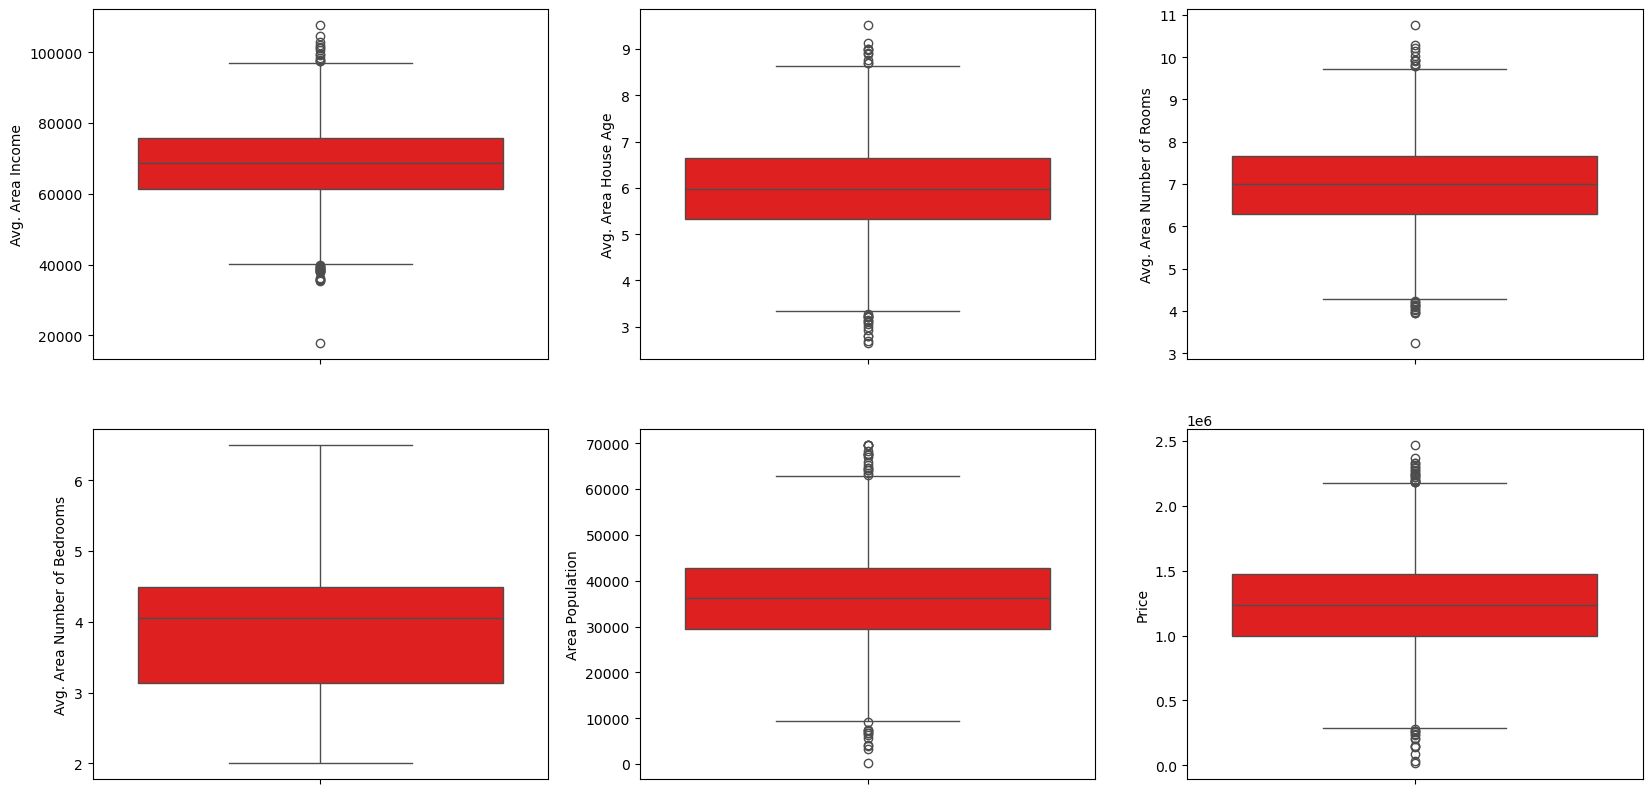

In [61]:
# Detecting Outliers Using Boxplot
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k in df.columns:
    sns.boxplot(df[k], ax=axs[index], color='r')
    index += 1

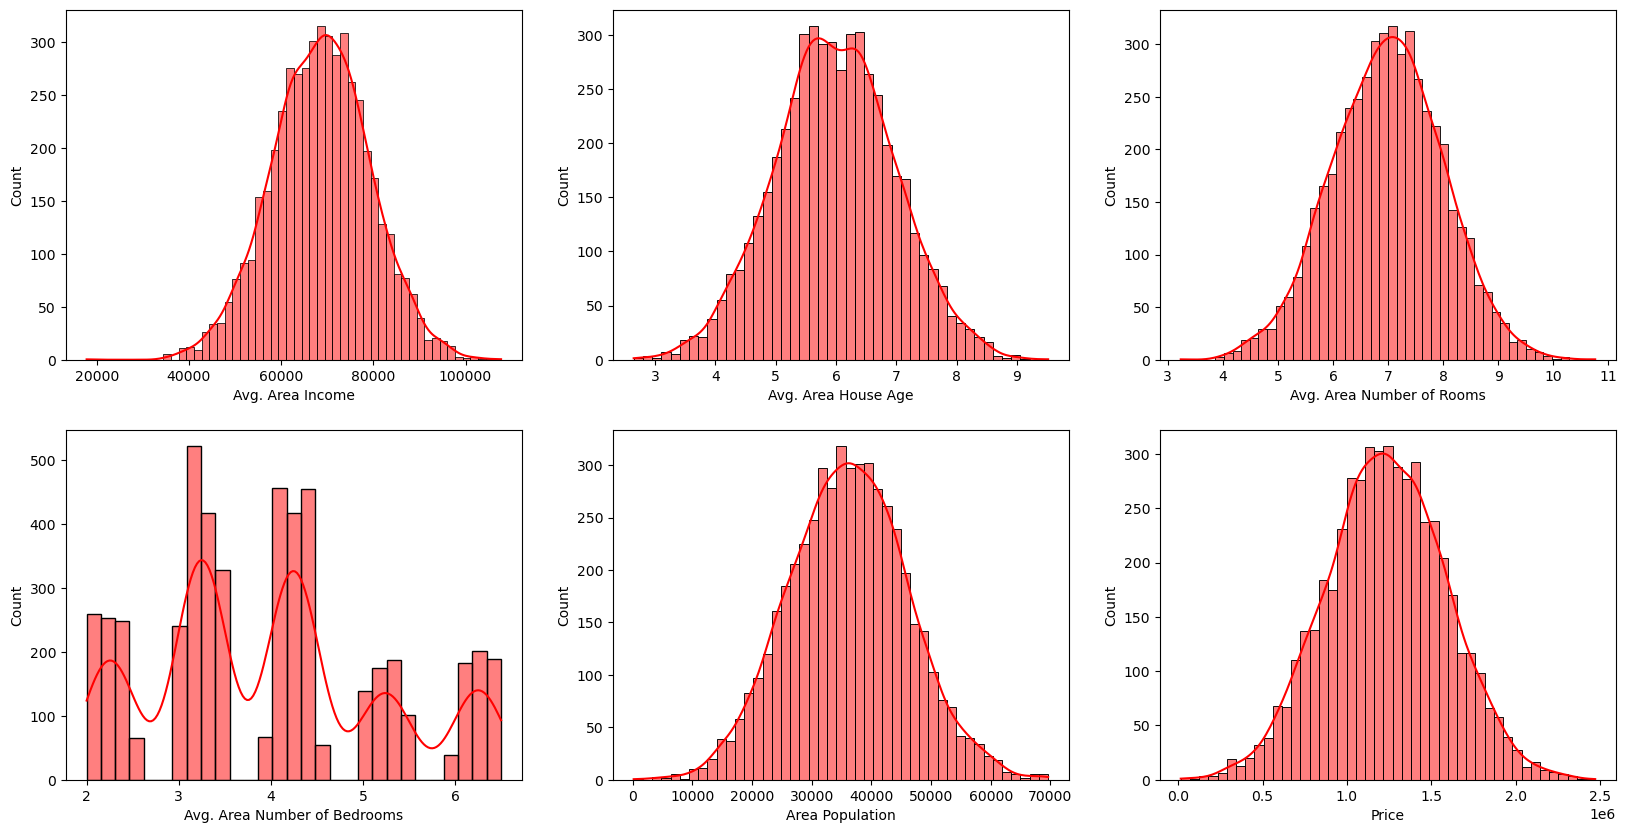

In [62]:
# Checking the distribution of the columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k in df.columns:
    sns.histplot(df[k], ax=axs[index], color='r', kde=True)
    index += 1
plt.show()

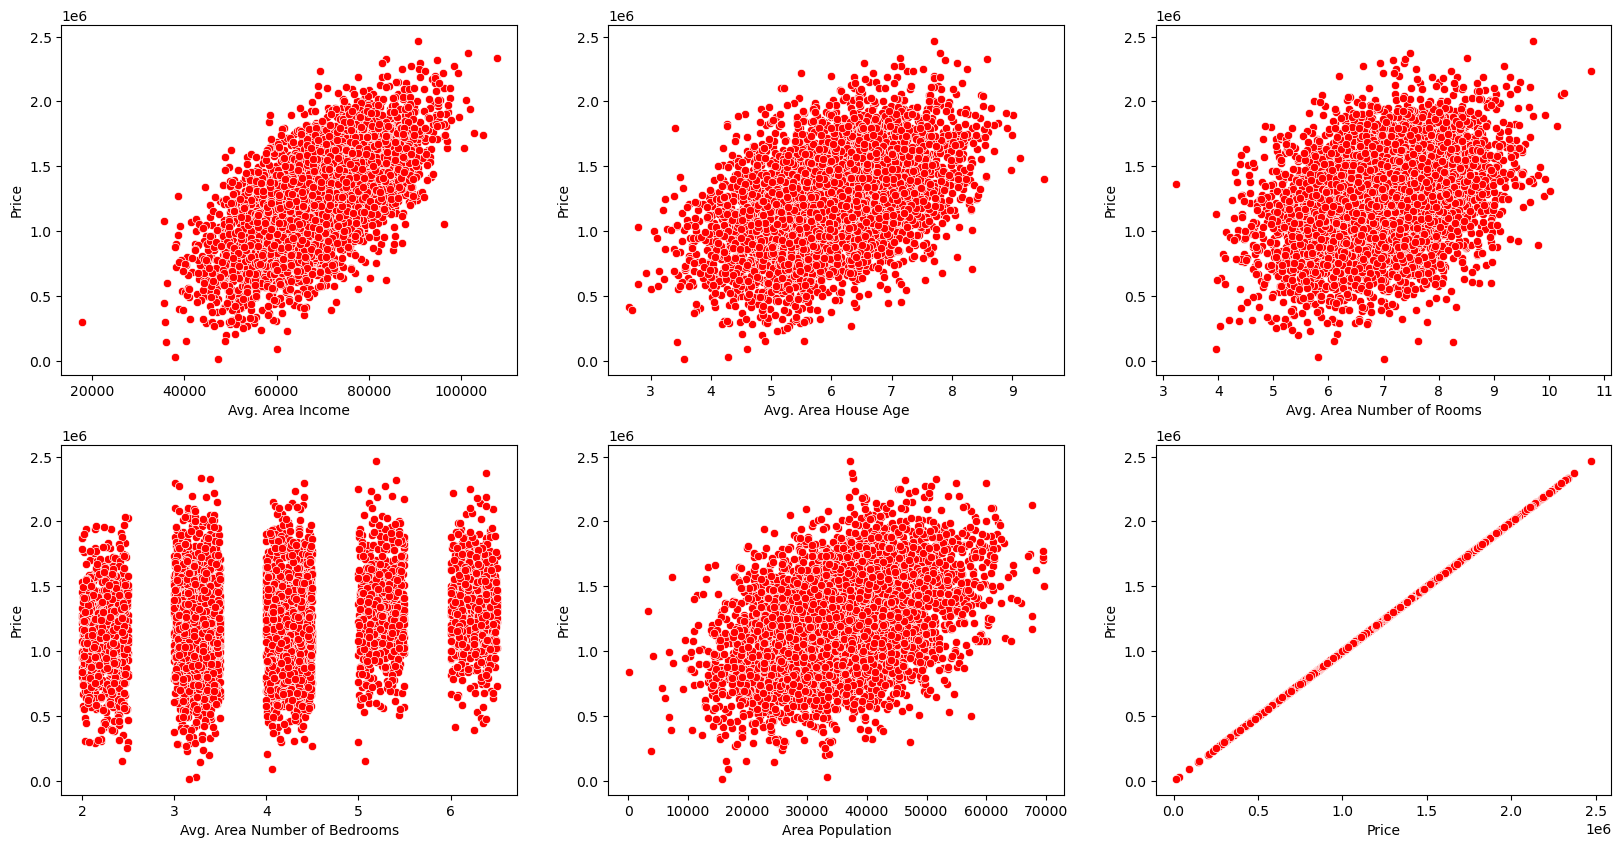

In [63]:
# House Price vs. Key Factors
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i in df.columns:
    sns.scatterplot(df, ax=axs[index], color='r', x=i , y='Price')
    index += 1
plt.show()

In [65]:
dependent_df = df.drop(columns='Price')

<Axes: >

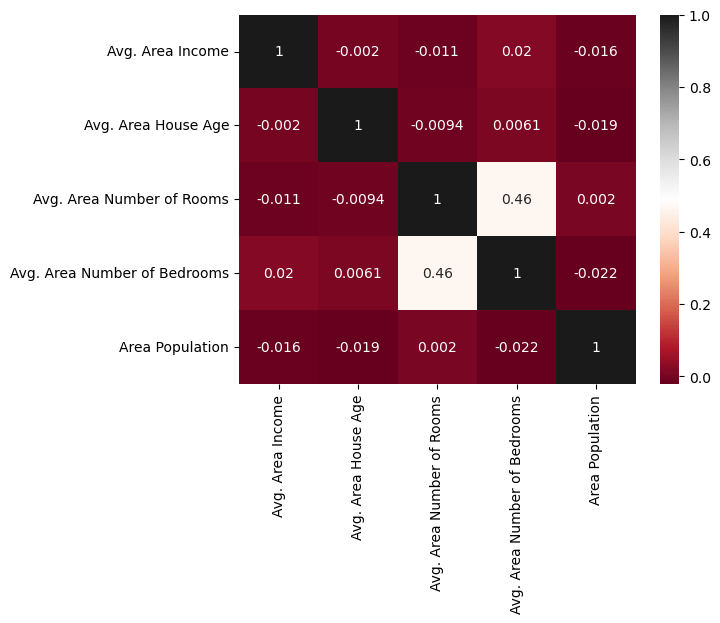

In [ ]:
# Checking the correlation between Dependent Variables
sns.heatmap(dependent_df.corr(), cmap="RdGy", annot=True)

# <a id='data-preprocessing'></a><p style="color: orange; font-weight: bold;">Data Preprocessing

## <a id='outliers'></a><p style="color: Grey; font-weight: bold;">Removing Outliers

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (f'Ql - \n\n {Q1} \n' )
print (f'Q3 - \n\n {Q3} \n' )
print (f'IQR - \n\n {IQR} ' )

Ql - 

 Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64 

Q3 - 

 Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64 

IQR - 

 Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64 


In [18]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f"Lower Bound : \n\n{lower_bound}\n")
print(f"Upper Bound : \n\n{upper_bound}\n")

Lower Bound : 

Avg. Area Income                 40026.397972
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.115000
Area Population                   9217.885601
Price                           287127.531305
dtype: float64

Upper Bound : 

Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64



In [19]:
df = df[~((df<lower_bound)| (df > upper_bound)).any(axis=1)]

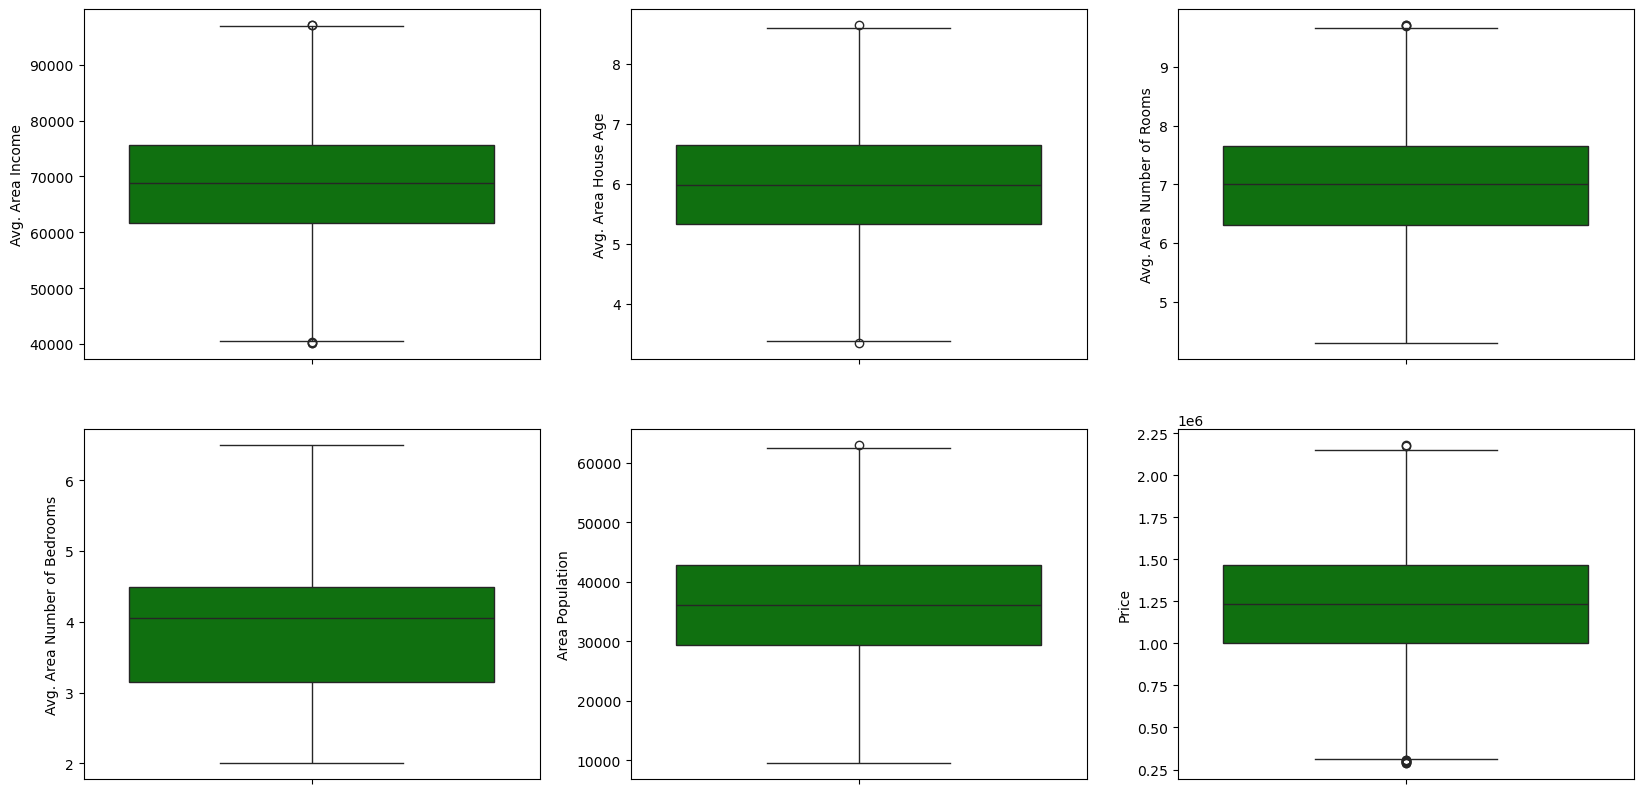

In [ ]:
# Boxplot After Removing Outliers
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k in df.columns:
    sns.boxplot(df[k], ax=axs[index], color='g')
    index += 1

# <a id='model-building'></a><p style="color: orange; font-weight: bold;">Model Building

## <a id='split'></a><p style="color: grey; font-weight: bold;">Train Test Split

In [21]:
# Spliting the data into Dependent and Independent Variable
x = df.drop(columns="Price")
y = df["Price"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [23]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4014,78646.308678,4.084092,7.768766,4.40,17551.706389
2977,70894.141135,7.040708,6.937167,4.01,24878.461732
2550,48278.860157,5.257101,7.435502,6.43,51148.225118
3158,59938.751100,6.506754,4.990365,2.33,44065.149434
4276,72630.009404,5.737896,4.711060,3.03,45888.874231
...,...,...,...,...,...
4551,79500.398946,8.554884,6.160048,3.29,32069.117413
478,62685.270752,6.057649,6.766130,2.17,42018.938568
3185,66469.369473,4.663863,6.117542,4.13,22670.608616
3881,59084.725195,7.086564,6.144059,2.11,42955.908360


In [24]:
y_train

4014    9.209516e+05
2977    1.383566e+06
2550    9.438547e+05
3158    1.021127e+06
4276    1.160398e+06
            ...     
4551    1.727983e+06
478     1.025461e+06
3185    4.122692e+05
3881    1.073254e+06
880     1.967637e+06
Name: Price, Length: 3405, dtype: float64

## <a id="model-selection"></a><p style="color: grey; font-weight: bold;">Model Selection

## <a id="linear-regression"></a><p style="color: slateblue; font-weight: bold;">Linear Regression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_predict_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [28]:
print("R2 Score for Linear Regression for Training is: ",r2_score(y_train,y_predict_train)*100)
print("R2 Score for Linear Regression for Test is: ",r2_score(y_test,y_pred_test)*100)

R2 Score for Linear Regression for Training is:  91.29512200973927
R2 Score for Linear Regression for Test is:  90.89357489769966


## <a id="gradient-boosting"></a><p style="color: slateblue; font-weight: bold;">Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [30]:
y_predict_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)

In [31]:
print("R2 Score for Linear Regression Train is: ",r2_score(y_train,y_predict_train)*100)
print("R2 Score for Linear Regression Test is: ",r2_score(y_test,y_pred_test)*100)

R2 Score for Linear Regression Train is:  92.67260458211734
R2 Score for Linear Regression Test is:  89.26839677198427


## <a id="random-forest"></a><p style="color: slateblue; font-weight: bold;">Random Forest

In [32]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
y_predict_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [35]:
print("R2 Score for Random Forest is: ",r2_score(y_train,y_predict_train)*100)
print("R2 Score for Linear Regression Test is: ",r2_score(y_test,y_pred_test)*100)

R2 Score for Random Forest is:  98.3444047865155
R2 Score for Linear Regression Test is:  87.53375209997377


## <a id="xgboost"></a><p style="color: slateblue; font-weight: bold;">XGBoost

In [36]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
y_predict_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [39]:
print("R2 Score for Random Forest is: ",r2_score(y_train,y_predict_train)*100)
print("R2 Score for Linear Regression Test is: ",r2_score(y_test,y_pred_test)*100)

R2 Score for Random Forest is:  98.48467773932519
R2 Score for Linear Regression Test is:  86.47431182013375


# <a id="model-training"></a><p style="color: grey; font-weight: bold;">Model Training

Model Selected **Linear Regression** Because it Gives the Best Score For Both Train And Test Data 

In [40]:
y_predict_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# <a id="model-evaluation"></a><p style="color: grey; font-weight: bold;">Model Evaluation

In [41]:
# Training Evaluation
def training_evaluation (actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    print (f'MSE: {mse} ' )
    print (f' RMSE : {rmse} ' )
    print (f'MAE: {mae} ' )
    print (f'R2_Score: {r2} ' )
    plt.scatter(actual, predicted, color='k' , label='Actual_Price' )
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='r' , ls='--' , lw=3)
    plt.title( 'Best Fit Line on Training Data' )
    plt.xlabel( 'Actual Price' )
    plt.ylabel( 'Predicted Price' )
    plt.legend()
    plt.show()

MSE: 9929591345.035 
 RMSE : 99647.33486167605 
MAE: 80219.66725530352 
R2_Score: 0.9129512200973927 


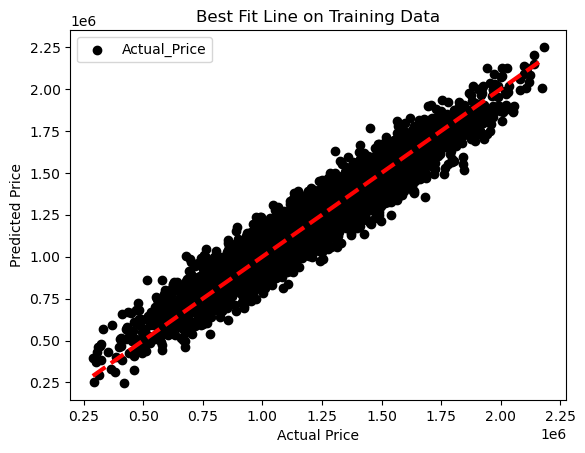

In [ ]:
training_evaluation(y_train, y_predict_train)

In [47]:
# Test Evaluation
def test_evaluation (actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    print (f'MSE: {mse} ' )
    print (f'RMSE: {rmse} ' )
    print (f'MAE: {mae} ' )
    print (f'R2_Score: {r2} ' )
    plt.scatter(actual, predicted, color='g' , label='Actual_Price' )
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='k' , ls='--' , lw=3)
    plt.title( 'Best Fit Line on Test Data' )
    plt.xlabel( 'Actual Price' )
    plt.ylabel( 'Predicted Price' )
    plt.legend()
    plt.show()

MSE: 10603736006.560024 
RMSE: 102974.44346322064 
MAE: 82664.94102074031 
R2_Score: 0.9089357489769967 


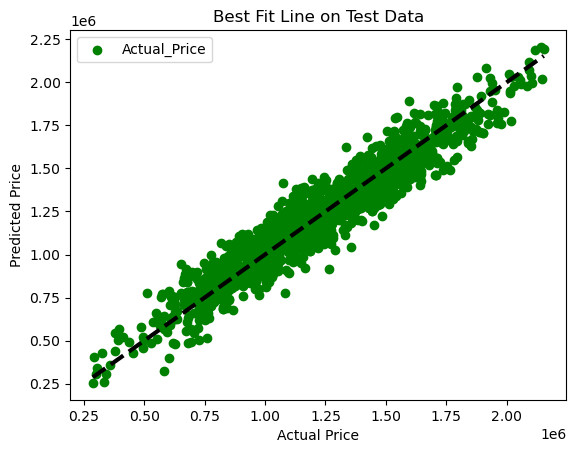

In [ ]:
test_evaluation(y_test, y_pred_test)

# <a id='conclusion'></a><p style="color: orange; font-weight: bold;">Conclusion
>In this notebook, we built a model to predict real estate prices in USA using features like Avg. Area House Age, Area Population, and Avg. Area Income. After thorough preprocessing and training, the model achieved an **R² score of approximately 91%**, effectively explaining the variance in the dataset.  
>This strong performance highlights the model's utility for buyers, sellers, and investors, enabling data-driven decision-making in Pune's real estate market. Future improvements could involve integrating market trends or exploring advanced algorithms to enhance accuracy further.